Importing required libriries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

Load the tweets file using read_csv function from Pandas package

In [77]:
data=pd.read_csv('TwitterHate.csv');

In [78]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [79]:
data.drop('id',inplace=True,axis=1)

In [80]:
data.iloc[np.random.randint(0,len(data))]

label                                                    0
tweet     @user saw @user in brisbane four times in my ...
Name: 11659, dtype: object

In [81]:
df=data.copy()

Cleaning the data

In [82]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [83]:
df['tweet'] = df['tweet'].apply(simplify)

removing text with '@'

In [84]:
df['tweet'].replace(r'@\w+','',regex=True,inplace=True)

In [85]:
df['tweet'].replace(r'http\S+','',regex=True,inplace=True)

In [86]:
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [87]:
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[#model, i, love, u, take, with, u, all, the, ..."
4,0,"[factsguide, :, society, now, #motivation]"


Removing stopwords

In [88]:
# Downloads the data.
import nltk
nltk.download('stopwords')


# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stoplist = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
stoplist[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [90]:
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stoplist]
    return clean_text   

In [91]:
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [92]:
df['tweet'].head()

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, #lyft, credit, can't, use, cause, off...
2                                    [bihday, majesty]
3        [#model, love, u, take, u, time, ur, !, !, !]
4                [factsguide, :, society, #motivation]
Name: tweet, dtype: object

Spelling check

In [93]:
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text

In [94]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)    

In [95]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [96]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, can't, use, cause, offe..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


Extra cleanup by removing terms with a length of 1.

In [97]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text     

In [98]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [99]:
df.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit can't use cause offer wheel...
2,0,bihday majesty
3,0,model love u take u time ur ! ! !
4,0,factsguide : society motivation


In [100]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [101]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [102]:
df['tweet'] = df['tweet'].apply(rem_digits)

In [103]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [104]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, can't, use, cause, offe..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time, ur, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


In [105]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [106]:
df['tweet'] = df['tweet'].apply(rem_nonalpha)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


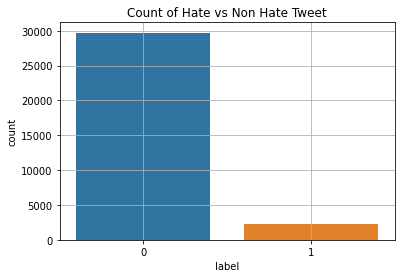

In [107]:
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

In [108]:
from collections import Counter
results = Counter()
df['tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('love', 2762), ('day', 2319), ('happy', 1679), ('u', 1178), ('like', 1160), ('time', 1138), ('life', 1124), ('today', 1017), ('new', 994), ('thankful', 947)]


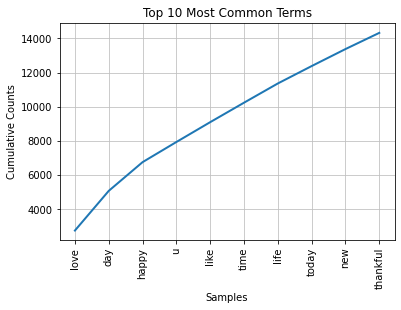

In [109]:
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

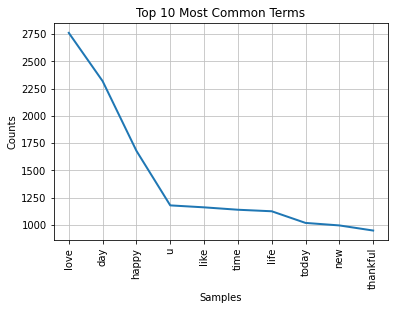

In [110]:
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

In [111]:
#check for the null values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [112]:
#join the tokens back to form the string
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [113]:
X = df['tweet']
y = df['label']

In [114]:
#split the data 
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


In [115]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [116]:
vectorizer = TfidfVectorizer(max_features=5000)

In [117]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [118]:
#check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

In [119]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [120]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [121]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [122]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.95581
Accuracy Score on test set 0.94838


In [123]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.96      0.96      0.95     25569



In [124]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.90      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.93      0.65      0.71      6393
weighted avg       0.95      0.95      0.94      6393



In [125]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [126]:
#define the weight of the class labels using inverse ratio
weights = {0:1.0,1:13.0}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver='lbfgs',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.60      0.98      0.74      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.48      0.74      0.58       448

    accuracy                           0.93      6393
   macro avg       0.73      0.84      0.77      6393
weighted avg       0.94      0.93      0.93      6393



In [127]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [140]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['liblinear']
space['penalty'] = ['l1']
space['C'] = loguniform(1e-5, 100)

In [141]:
#check the search space 
print(space)

{'solver': ['liblinear'], 'penalty': ['l1'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fecd29745d0>}


In [142]:
#define the model with balanced class weights
weights = {0:1.0,1:1.0}
clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=seed)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

In [143]:
grid_result.best_estimator_

LogisticRegression(C=44.19413587124196, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [144]:
clf = LogisticRegression(C=44.19413587124196,penalty='l1',solver='liblinear',class_weight=weights)

In [145]:
#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23775
           1       0.99      0.96      0.97      1794

    accuracy                           1.00     25569
   macro avg       0.99      0.98      0.99     25569
weighted avg       1.00      1.00      1.00     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.60      0.58      0.59       448

    accuracy                           0.94      6393
   macro avg       0.78      0.78      0.78      6393
weighted avg       0.94      0.94      0.94      6393



LogisticRegression(C=0.3667218272430297, class_weight={0: 1.0, 1: 13},
                   penalty='l1', solver='liblinear')

In [149]:
#instantiate the best model
clf = LogisticRegression(C=0.16731783677034165,penalty='l2',solver='liblinear',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     23775
           1       0.53      0.93      0.68      1794

    accuracy                           0.94     25569
   macro avg       0.76      0.93      0.82     25569
weighted avg       0.96      0.94      0.95     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.47      0.77      0.58       448

    accuracy                           0.92      6393
   macro avg       0.73      0.85      0.77      6393
weighted avg       0.95      0.92      0.93      6393



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


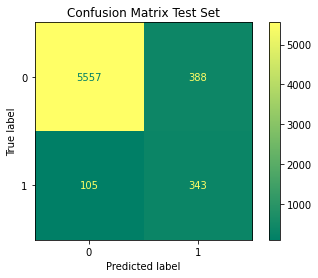

In [150]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap='summer')
plt.title('Confusion Matrix Test Set')
plt.show()